# scikit-tdaとPersimでPD間の距離を計算する

## ランダムなデータの生成からパーシステンス図の出力まで。

In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

from ripser import Rips

## データの生成

データ数$N = 200$で「ノイズありのdataset」と「ノイズありの円周状dataset」をつくる。

In [2]:
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale): # noise 
    return scale * np.random.random((N, 2))

def circle(N, scale, offset): # circle
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)] # dataset with noise

half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)] # circular dataset with noise

datas = []
datas.extend(just_noise) 
datas.extend(with_circle)

# Define labels
labels = np.zeros(N)
labels[N_per_class:] = 1

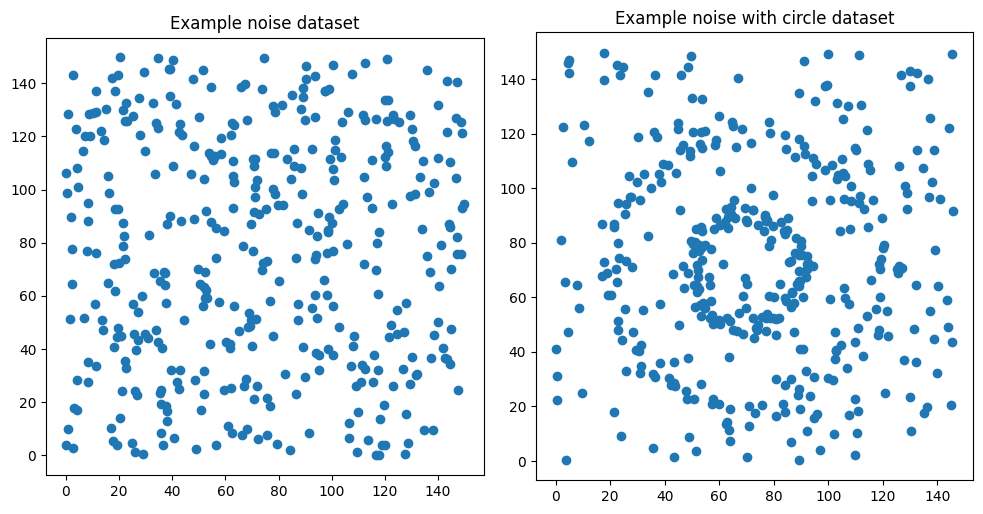

In [3]:
# Visualize the data

# plot area
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,5)

# plotting data with noise
xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')


# plotting circular data with noise
xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()

## ホモロジーの計算

Rips複体から$H_1$を計算する。

In [4]:
rips = Rips(maxdim=1, coeff=2) 
diagrams = [rips.fit_transform(data) for data in datas]
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


##### 各コマンドの意味
`Rips()`: ripserには`Rips`クラスというものがある。
`fit_transform`: 点集合に対してRips複体でのパーシステンス図を返す関数。入出力はnumpy配列。

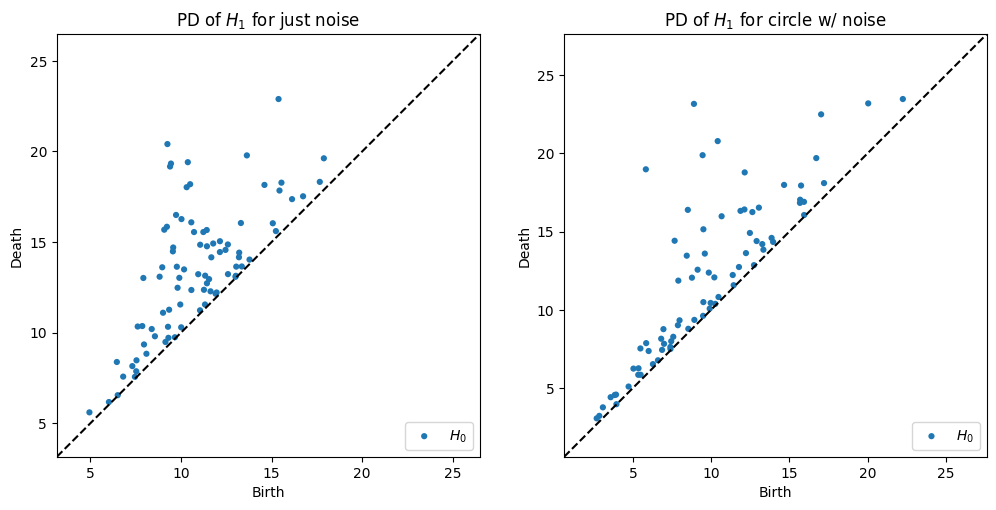

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

## Persimで距離の計算

In [6]:
import persim
import tadasets

In [7]:
distance_bottleneck, matching = persim.bottleneck(diagrams_h1[0], diagrams_h1[-1], matching=True)

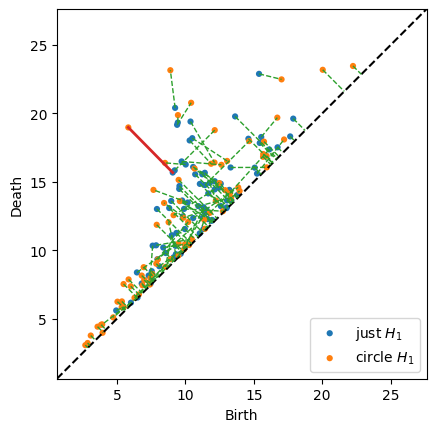

In [8]:
persim.bottleneck_matching(diagrams_h1[0], diagrams_h1[-1], matching, labels=['just $H_1$', 'circle $H_1$'])
plt.show()

In [9]:
print(distance_bottleneck)

3.297186851501465
